<a href="https://colab.research.google.com/github/joseflix/DocenciaUAB/blob/master/MN1/2021_2022/Pr%C3%A0ctiques/Pr%C3%A0ctica2_Integracio%CC%81n_Solucions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Práctica 2: Integración numérica** [Solucions]


**Objectivo de la práctica** 

Evaluar integrales usando el método de integración *Riemann* e integración *MonteCarlo* (con el método de aceptación/rechazo).

En esta práctica calcularemos la integral de un semi-círculo de radio = 1, usando estos métodos, y como entegra calcularemos la integral de $sin(x)$ ente 0 y $\pi$ usando el método de integración por MonteCarlo. 

**Función a integrar**

La primera función $f(x)$ a integrar corresponde a aquellos puntos entre [-1,1] en x que cumplen la condición $y^2 + x^2 = 1$. Así que la función a integrar es:

$$
f(x) = \sqrt{1-x^2}
$$

y la integral la podemos calcular de forma analítica:

$$
I = \int_{-1}^{1}f(x)dx = \int_{-1}^{1}\sqrt{1-x^2}dx = \frac{\pi}{2}
$$

<hr>

### <font color='orange'>**> Python #1**</font>

Vamos a escribir una parte de código que defina f(x), y dibujemos la función en el rango [-1,1], evaluando la función en 1000 puntos distribuidos de forma uniforme en dicho rango. 


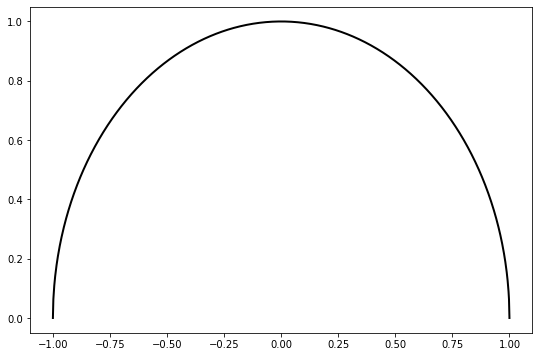

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
  return np.sqrt(1-x*x)

Np = 1000
x = np.linspace(-1,1,Np)

plt.figure(figsize=(9, 6))
plt.plot(x,f(x),'k-',lw=2)
plt.show()

## **Fundamentos de la cuadratura**

Queremos obtener la integral $I$ de una función $f(x)$ a partir de una aproximación $I_N$ tal que 

$$
    I = \int^b_a f(x) dx \approx I_N = \sum^{N}_{i=1} w_i f(x_i)
$$

donde los $x_i$ son los *puntos de cuadratura* o *nodos* y los "$w_i$" son los *pesos*. Normalmente una determinada regla de cuadratura especifica los puntos $x_i$ y el conjunto de pesos $w_i$.

La convergencia requiere:

$$
    \lim_{N \rightarrow \infty} I_N = I.
$$

## **Sumas de Riemann**

Cogemos una función $f(x)$ y una partición del intervalo $[a,b]$ en $\{x_i\}^N_{i=0}$, donde $a = x_0 < x_1 < \ldots < x_N = b$. Consideramos los puntos $x^*_i$ como $x^*_i \in [x_i, x_{i+1}]$. 

Definimos los sumatorios de *Riemann* como:

$$\int^b_a f(x) dx = \lim_{N\rightarrow \infty} \sum^{N-1}_{i=0} f(x_i^*) (x_{i+1} - x_i)$$

Esta es una definición general del método, que tiene diferentes técnicas de cuadratura basadas en como escogemos $x_i^* \in [x_i, x_{i+1}]$. Algunas técnicas que existen son:

*   Regla del punto medio
*   Método Newton-Cotes
*   Regla de Simpson

Hay un notebook extenso, disponible **[aquí](https://github.com/joseflix/DocenciaUAB/blob/master/MN1/2021_2022/Pr%C3%A0ctiques/Pr%C3%A0ctica2_Integraci%C3%B3n_EXTRA.ipynb)** con ejemplos usando todos estos métodos. 

### **Regla del punto medio**

Escogemos $x_i^*$ tal que:

$$x_i^* = \frac{x_{i+1} + x_i}{2}$$

de manera que

$$I = \int^b_a f(x) dx \approx \sum^{N-1}_{i=0} f\left(\frac{x_{i+1} + x_i}{2} \right ) (x_{i+1} - x_i) = I_N$$

sobre cada intervalo $\Delta x_i = x_{i+1} - x_i$ 

### <font color='orange'>**> Python #2**</font>

Vamos a escribir una parte de código que integre la función del semi-círculo $f(x)$ que hemos definido antes, en el rango [-1,1], usando el método de Riemann, con la regla del punto medio. Usa 10 intervalos en el rango para evaluar la integral $I_{10}$. 

Sabemos que la integral $I$ de nuestro semi-círculo de radio 1 es $\pi/2$. Compara el resultado obtenido con el valor analítico.

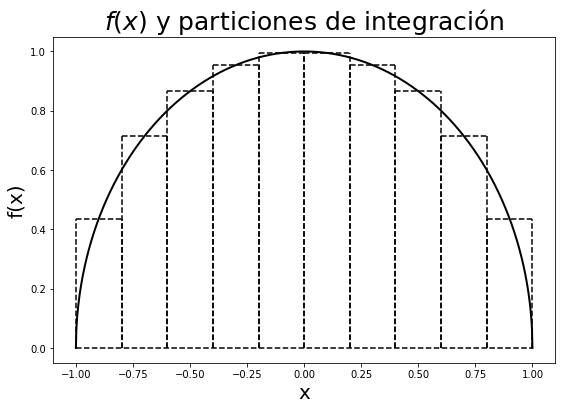

Numerical integration : 1.5859939118065423
Analytical integration : 1.5707963267948966
Error : 0.97%


In [ ]:
num_partitions = 10
x_hat = np.linspace(-1.0, 1.0, num_partitions + 1)
x_star = 0.5 * (x_hat[1:] + x_hat[:-1])
delta_x = x_hat[1] - x_hat[0]
#x_start = x_hat[:-1]+delta_x/2. # Otra parte de código más fácil de entender

plt.figure(figsize=(9, 6))
plt.plot(x, np.zeros(x.shape), 'k--') # Plota la parte de abajo con rayas
plt.plot(x, f(x), 'k-',lw=2)

for i in range(num_partitions):
    plt.plot([x_hat[i], x_hat[i]], [0.0, f(x_star[i])], 'k--')
    plt.plot([x_hat[i + 1], x_hat[i + 1]], [0.0, f(x_star[i])], 'k--')
    plt.plot([x_hat[i], x_hat[i + 1]], [f(x_star[i]), f(x_star[i])], 'k--')
    
plt.ylabel("f(x)", fontsize=20)
plt.xlabel("x", fontsize=20)
plt.title("$f(x)$ y particiones de integración", fontsize=25)
plt.show()

I_hat = np.zeros(x_star.shape) # También se puede crear un array vacío I_hat = [], y usar la función append
I_hat[0] = f(x_star[0]) * delta_x
for i in range(1, num_partitions):
    I_hat[i] = I_hat[i - 1] + f(x_star[i]) * delta_x

print("Numerical integration : {}".format(I_hat[-1]))
print("Analytical integration : {}".format(np.pi/2.))
print("Error : {:3.2f}%".format(100.*abs(I_hat[-1]-np.pi/2.)/(np.pi/2.)))

**Evidentemente**, si aumentamos el número de particiones o intervalos, evaluamos la integral con mejor precisión si comparamos con la integral analítica. Al final de la práctica hay un material adicional que lo muestra (Material adicional #1).

## **Integración MonteCarlo**

Usaremos el método Monte Carlo para calcular la integral de $f(x)$: si lanzamos aleatoriamente puntos (x, y) en la gráfica de la función que queremos integrar, el número de puntos que caen bajo la curva $𝑁_𝑉$ es proporcional al área $𝐼$. Por lo tanto, si generamos $𝑁_𝑇$ puntos sobre un área $𝐴_𝑇$ que contiene $𝐼$, obtenemos la siguiente relación:

$$
I = A_T \frac{N_V}{N_T}
$$



### <font color='orange'>**> Python #3**</font>

Vamos a calcular la integral de nuestro semi-círculo de radio 1 usando este método de aceptación/rechazo, usando 1000 puntos aleatorios lanzados en el área $A_T$. Evalua la integral y haz una gráfica de $f(x)$ y dibuja en verde aquellas parejas de puntos aleatorios $(x,y)$ que quedan por debajo de $f(x)$, y en rojo los que quedan por encima. 

*Notas:*

Para generar N números aleatorios distribuidos de forma uniforme entre $a$ y $b$ se tiene que usar esta función de Numpy:

```
numpy.random.uniform(a,b,N)
```

Para encontrar el área $A_T$, y por tanto los límites de esa área, necesitamos saber cuál es el rango de valores que toma la función $f(x)$. Así pues tenemos que encontrar el máximo y mínimo de la función. Se pueden usar estas funciones de Numpy:

```
numpy.amin(f(x))
numpy.amax(f(x))
```
Pero en nuestro caso sabemos que $y_{min}$ = 0 y $y_{max}$ = 1.

Una vez tienes el rectángulo de área $A_T$ definido en nuestro caso por $(-1,1),(y_{min},y_{max})$, generamos N puntos $(x,y)$ distribuidos de forma uniforme en ese intervalo. 

Una vez generados esos puntos, contamos cuantas parejas de puntos caen por debajo de la curva $f(x)$ y evaluamos la integral mediante la expresión anterior.

Si aumentamos el número de pares aleatorios $(x,y)$, evaluamos la integral con mejor precisión si comparamos con la integral analítica. Este método de hecho se puede usar para determinar el valor $\pi$ de forma numérica. 

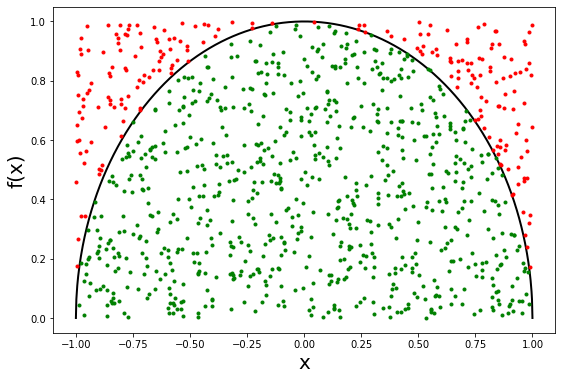

MC integration : 1.578
Analytical integration : 1.5707963267948966
Error : 0.46%


In [ ]:
y_min = 0.
y_max = 1.

N = 1000

x_tries = np.random.uniform(-1.0,1.0,N)
y_tries = np.random.uniform(y_min,y_max,N)

x_valid = x_tries[y_tries <= f(x_tries)]
y_valid = y_tries[y_tries <= f(x_tries)]

x_novalid = x_tries[y_tries > f(x_tries)]
y_novalid = y_tries[y_tries > f(x_tries)]

plt.figure(figsize=(9, 6))
plt.plot(x,f(x),'k-',lw=2)
plt.plot(x_valid,y_valid,'g.')
plt.plot(x_novalid,y_novalid,'r.')
plt.ylabel("f(x)", fontsize=20)
plt.xlabel("x", fontsize=20)
plt.show()

print("MC integration : {}".format((2.)*len(x_valid)/N,(2.)/np.sqrt(N)))
print("Analytical integration : {}".format(np.pi/2.))
print("Error : {:3.2f}%".format(100.*np.abs((2.)*len(x_valid)/N-np.pi/2.)/(np.pi/2.)))

### <font color='green'>**> ENTREGA**</font>

Calcula la integral de $f(x) = sin(x)$ a partir del método de simulación MonteCarlo:

$$
  \int^{\pi}_0 f(x)dx = \int^{\pi}_0 sin(x)dx
$$

La integral analítica es:

$$
    \int^\pi_0 sin(x)dx = \left . -\cos x \right|^\pi_0 = 2
$$

Usaremos el método Monte Carlo para calcular la integral: si lanzamos aleatoriamente puntos (x, y) en la gráfica de la función que queremos integrar, el número de puntos que caen bajo la curva $𝑁_𝑉$ es proporcional al área $𝐼$. Por lo tanto, si generamos $𝑁_𝑇$ puntos sobre un área $𝐴_𝑇$ que contiene $𝐼$, obtenemos la siguiente relación:

$$
I = A_T \frac{N_V}{N_T}
$$

Vamos primero a dibujar la función que queremos integrar y el área donde generaremos los puntos aleatorios: **[3 punts]**

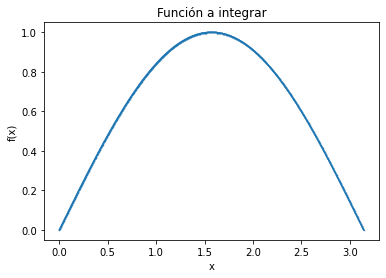

In [ ]:
# Parte 1

import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate

f = lambda x: np.sin(x) # función que usaremos para evaluar el sin(x)

x = np.linspace(0.0, np.pi, 1000) # Array de puntos en x para evaluar sin(x)

plt.plot(x,f(x),'.-',markersize=1)
plt.title("Función a integrar")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.show()

Genera 100 puntos aleatorios en el área $A_T$ para calcular la integral de $f(x)$, y compara el número con el valor de la integral analítica: **[4 punts]**

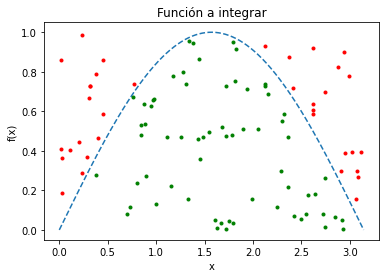

MC area = 2.042032700527818
Analytic Integral = 2


In [ ]:
## Parte 2
# Definimos el área, usando los min, y max de la integral, tanto en x como en y:

xmin = np.amin(x)
xmax = np.amax(x)
ymin = np.amin(f(x))
ymax = np.amax(f(x))

# También podemos usar los valores que queramos para el máximo de y, pero deteriora la precisión del cálculo, porque muchos puntos pueden quedar afuera
#ymax = 2.5

N = 100 # Número de puntos (x,y) que usaremos para calcular la integral. Si generamos más puntos, tenemos mejor precisión

x_tries = np.random.uniform(xmin,xmax,N)
y_tries = np.random.uniform(ymin,ymax,N)

x_valid = x_tries[y_tries <= f(x_tries)]
y_valid = y_tries[y_tries <= f(x_tries)]

x_novalid = x_tries[y_tries > f(x_tries)]
y_novalid = y_tries[y_tries > f(x_tries)]

plt.plot(x,f(x),'--')
plt.plot(x_valid,y_valid,'g.')
plt.plot(x_novalid,y_novalid,'r.')
plt.title("Función a integrar")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.show()

print("MC area = {}".format((xmax-xmin)*(ymax-ymin)*len(x_valid)/N))
print("Analytic Integral = 2")

Vemos que si generamos pocos números, la precisión de la integral es bastante mala. Si aumentamos el número N, la integral converge al valor de la integral analítica.

Aumentemos N de 100 a 10000 (en pasos de 100 en 100) y hagamos una gráfica de la precisión $P$ en % en función de N, donde $P$ es (usa la función de Numpy *abs* que calcula el valor absoluto de un número *np.abs(P)*): **[3 punts]**

$$
P(\%) = 100 \cdot |\frac{I_N-I_{analítica}}{I_{analítica}}|
$$


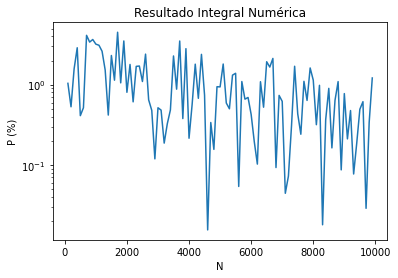

In [ ]:
Inte = []
P = []
Xpl = []

for N in range(100, 10000, 100):

  x_tries = np.random.uniform(xmin,xmax,N)
  y_tries = np.random.uniform(ymin,ymax,N)

  x_valid = x_tries[y_tries <= f(x_tries)]
  y_valid = y_tries[y_tries <= f(x_tries)]

  x_novalid = x_tries[y_tries > f(x_tries)]
  y_novalid = y_tries[y_tries > f(x_tries)]

  Xpl.append(N)
  Inte.append((xmax-xmin)*(ymax-ymin)*len(x_valid)/N)
  P.append(100.*np.abs(Inte[-1]-2.)/2)
plt.plot(Xpl,P)
plt.title("Resultado Integral Numérica")
plt.xlabel("N")
plt.yscale('log')
plt.ylabel("P (%)")
plt.show()

### <font color='red'>**> Material adicional #1**</font>

Veamos que si aumentamos el número de particiones o intervalos, en el método de Riemann, evaluamos la integral del semicírculo con mejor precisión si comparamos con la integral analítica. 

Vamos a escribir un código donde definamos una función que evalúe la integral del semi-círculo para N intervalos. Haremos una gráfica de como mejora la precisión de la integral, comparando con el valor analítico, cuando aumentamos el valor N. 

Aumentemos N de 10 a 1000 y hagamos una gráfica de la precisión $P$ en % en función de N, donde $P$ es:

$$
P(\%) = 100 \cdot |\frac{I_N-I_{analítica}}{I_{analítica}}|
$$

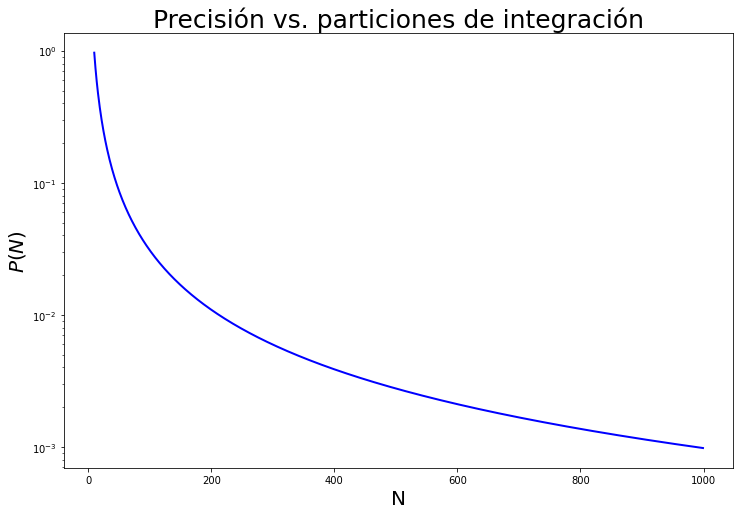

In [ ]:
# Definimos la función a integrar 

def f(x):
  return np.sqrt(1-x*x)

# Definimos una función que calcule la interal por el método de Riemann

def I_N(N):

  x = np.linspace(-1.0, 1.0, N+1)
  x_star = 0.5 * (x[1:] + x[:-1])
  delta_x = (x[1] - x[0])

  I_N = 0

  for i in range(N):
    I_N += delta_x * f(x_star[i])

  return I_N

# Integral analítica

I_A = np.pi/2

# Definimos una función que calcule el error 

def P(N):
  P =  100.*np.abs((I_N(N)-I_A)/(I_A))
  return P

# Creamos unas arrays donde guardar los datos

prec = []
n = []

# Llenamos las arrays

for N in range(10,1000):
  n.append(N)
  prec.append(P(N))

# Hacemos la gráfica


plt.figure(figsize=(12, 8))

plt.plot(n,prec,'b-',lw=2)

plt.yscale('log')
plt.ylabel("$P(N)$", fontsize=20)
plt.xlabel("N", fontsize=20)
plt.title("Precisión vs. particiones de integración", fontsize=25)
plt.show()

<hr> 

**Recuerda**

*   Rellena tu nombre, NIU i mail (gmail, si quieres recibir los comentarios/feedback acerca de tu entrega) en la cabecera de este Notebook.
*   Renombra el Notebook como "Pr2_NIU.ipynb", donde NIU es tu NIU (*por ejemplo: Pr2_2055007.ipynb*) 
*   Al final de la clase donde se realize una entrega, descarga este cuaderno en formato .ipynb y lo tienes que subir al siguiente *drop folder*: [Link](http://cern.ch/go/w8vV). Asegurate de que el fichero tiene el nombre correcto.
*   Solo se evaluará la parte de la entrega. Tendréis acceso a la solución de todas las partes y después de haber entregado la práctica.

<hr>